In [1]:
!pip3 install torch torchvision torchaudio

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
digits = datasets.load_digits()

In [4]:
target = digits.target
flatten_digits = digits.images.reshape((len(digits.images), -1))

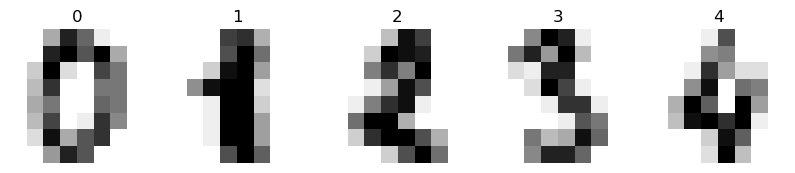

In [5]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
for ax, image, label in zip(axes, digits.images, target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(flatten_digits, target, test_size=0.2)

In [7]:
scaler = StandardScaler()
X_train_logistic = scaler.fit_transform(X_train)
X_test_logistic = scaler.transform(X_test)

In [8]:
logit = LogisticRegression(C=0.01, penalty='l1', solver='saga', tol=0.1, multi_class='multinomial')

In [9]:
logit.fit(X_train_logistic, y_train)

LogisticRegression(C=0.01, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.1)

In [10]:
y_pred_logistic = logit.predict(X_test_logistic)

In [11]:
print("Accuracy: "+str(logit.score(X_test_logistic, y_test)))

Accuracy: 0.7888888888888889


In [12]:
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmx = confusion_matrix(y_test, y_pred_logistic, labels=label_names)

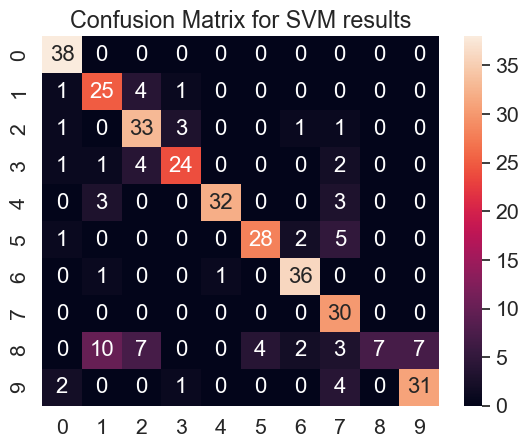

In [13]:
df_cm = pd.DataFrame(cmx)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

In [14]:
svm_classifier = svm.SVC(gamma='scale')

In [15]:
svm_classifier.fit(X_train, y_train)

SVC()

In [16]:
y_pred_svm = svm_classifier.predict(X_test)

In [17]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred_svm)))

Accuracy: 0.9777777777777777


In [18]:
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmx = confusion_matrix(y_test, y_pred_svm, labels=label_names)

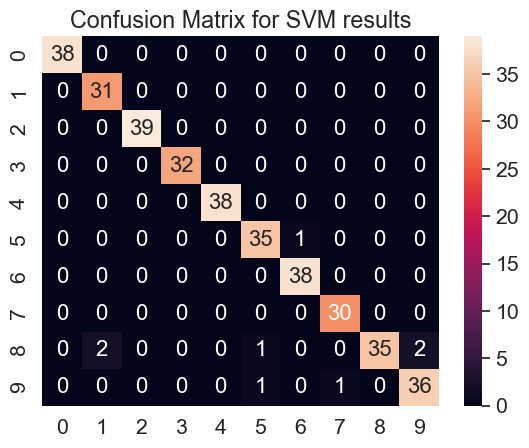

In [19]:
df_cm = pd.DataFrame(cmx)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()